In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

### Data Cleaning and Initial Observations

In [82]:
x = pd.read_csv('/data/ya.csv')
y = x

In [83]:
id_to_category = {}

with open('C:/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
x['category_id'] = x['category_id'].apply(lambda y: str(y))
x['Category Title'] = x['category_id'].map(id_to_category)
x

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Category Title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,Science & Technology
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,Entertainment
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,Science & Technology
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",Film & Animation
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...",News & Politics


In [84]:
#Any missing values for certain variables?
print(x['views'].isnull().any().any())
print(x['likes'].isnull().any().any())
print(x['dislikes'].isnull().any().any())
print(x['comment_count'].isnull().any().any())
print(x['title'].isnull().any().any())
print(x['description'].isnull().any().any())
#For all relevant variables, there are no missing values. Any description analysis will not treat a missing value as something
#that should be filled in, as a description can intentionally be left blank by a content creator. 

False
False
False
False
False
True


In [85]:
views = x['views']
likes = x['likes']
dislikes = x['dislikes']
comments = x['comment_count']
title = x['title']
desc = x['description']

In [86]:
print("There are", views[views == 0].count(), "trending videos with 0 views.")
print("There are", likes[likes == 0].count(), "trending videos with 0 likes.")
print("There are", dislikes[dislikes == 0].count(), "trending videos with 0 dislikes.")
print("There are", comments[comments == 0].count(), "trending videos with 0 comments.")
print("There are", desc.isnull().sum(), "trending videos with no description.")


There are 0 trending videos with 0 views.
There are 172 trending videos with 0 likes.
There are 383 trending videos with 0 dislikes.
There are 760 trending videos with 0 comments.
There are 570 trending videos with no description.


In [87]:
#Which channels have the most trending videos on Youtube?
pop_channel = x['channel_title'].value_counts().head(20)

### EDA

In [88]:
#Summary Statistics for Relavant Variables
#These values make it apparent that there are some extremely high values driving up the mean value in each case. 
print(x['views'].mean())
print(x['views'].median())
print("The mean and median number of views differ by:", abs(x['views'].mean()-x['views'].median()))

print(x['likes'].mean())
print(x['likes'].median())
print("The mean and median number of likes differ by:", abs(x['likes'].mean()-x['likes'].median()))

print(x['dislikes'].mean())
print(x['dislikes'].median())
print("The mean and median number of dislikes differ by:", abs(x['dislikes'].mean()-x['dislikes'].median()))

print(x['comment_count'].mean())
print(x['comment_count'].median())
print("The mean and median number of comments differ by:", abs(x['comment_count'].mean()-x['comment_count'].median()))

2360784.6382573447
681861.0
The mean and median number of views differ by: 1678923.6382573447
74266.7024347359
18091.0
The mean and median number of likes differ by: 56175.7024347359
3711.400888910596
631.0
The mean and median number of dislikes differ by: 3080.400888910596
8446.803682629612
1856.0
The mean and median number of comments differ by: 6590.803682629612


In [89]:
#Outlier/Range Analysis for Views
print(x['views'].sort_values().head(10))
print(x['views'].sort_values().tail(10))

14335    549
14563    554
14782    559
14531    658
546      687
777      704
14750    713
14984    745
12716    748
160      773
Name: views, dtype: int64
36710    179045286
36913    184446490
37123    190950401
37333    196222618
37531    200820941
37730    205643016
37935    210338856
38146    217750076
38345    220490543
38547    225211923
Name: views, dtype: int64


In [90]:
#Interesting spread here, there are SEVERAL videos with 0 likes that went trending, yet also many that have 5 million +
print(x['likes'].sort_values().head(10))
print(x['likes'].sort_values().tail(10))

1490     0
14869    0
1868     0
23516    0
16303    0
22388    0
19093    0
16316    0
16324    0
3621     0
Name: likes, dtype: int64
36397    5053329
36611    5150831
36816    5232318
37031    5321402
37247    5386959
37453    5439015
37655    5486349
37861    5530568
38072    5595203
38273    5613827
Name: likes, dtype: int64


In [91]:
#Similar interesting trend to the likes
#Would be interesting if a video went trending that 0 people rated
print(x['dislikes'].sort_values().head(10))
print(x['dislikes'].sort_values().tail(10))

16762    0
10934    0
10931    0
1578     0
10917    0
16973    0
10907    0
1589     0
10902    0
10748    0
Name: dislikes, dtype: int64
10415    1278887
5236     1353647
10638    1415777
5452     1470383
10862    1517520
5699     1545015
5935     1602383
11096    1611043
6181     1643059
11323    1674420
Name: dislikes, dtype: int64


In [92]:
#Similar interesting trend of many videos with no comments.
print(x['comment_count'].sort_values().head(10))
print(x['comment_count'].sort_values().tail(10))

31474    0
20022    0
2362     0
5385     0
35241    0
5390     0
34228    0
2337     0
8313     0
2334     0
Name: comment_count, dtype: int64
10638    1194249
37453    1197130
37655    1204867
37861    1213172
38072    1225326
38273    1228655
10415    1238817
10862    1281094
11096    1321281
11323    1361580
Name: comment_count, dtype: int64


Text(0,0.5,'Number of Videos')

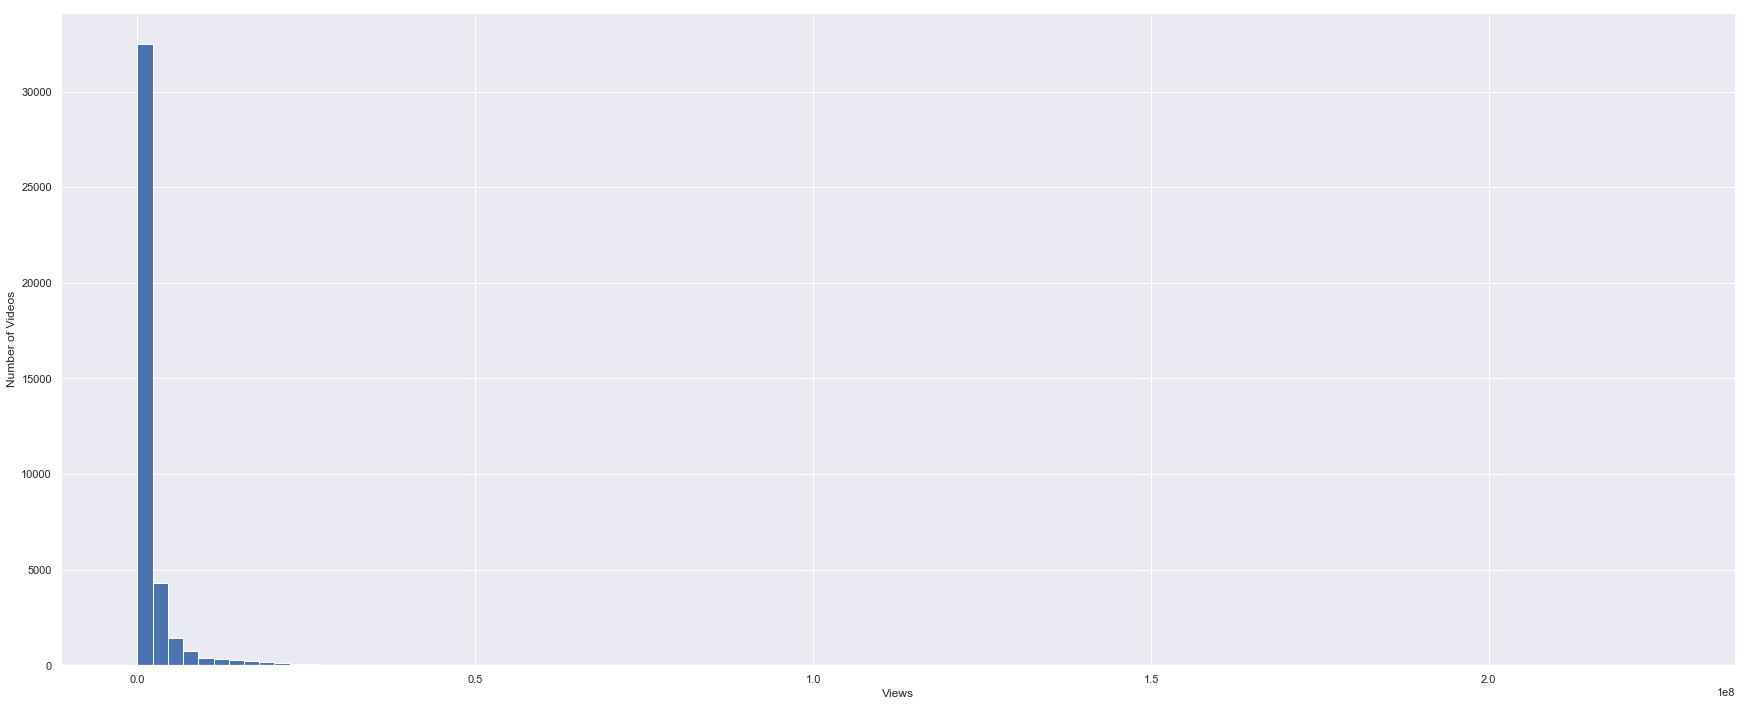

In [93]:
plt.hist(views, bins = 100, color = 'b')
plt.xlabel("Views")
plt.ylabel("Number of Videos")

+ When we try this with the variable comments, the range between high and low values is almost 100 times less than with views, however even with a varying bin count, the only thing a histogram reveals is that most of the data is at the lower end for the comments variable as well. I'll be avoiding using a histogram, and instead focusing on how the quantities relate to each other. 

(array([3.5912e+04, 2.6320e+03, 1.0360e+03, 5.1000e+02, 2.1600e+02,
        1.4700e+02, 6.6000e+01, 4.1000e+01, 2.2000e+01, 5.1000e+01,
        5.4000e+01, 3.6000e+01, 1.9000e+01, 2.2000e+01, 3.6000e+01,
        1.3000e+01, 2.0000e+01, 1.1000e+01, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 8.0000e+00, 4.0000e+00,
        6.0000e+00, 6.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00,
        4.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

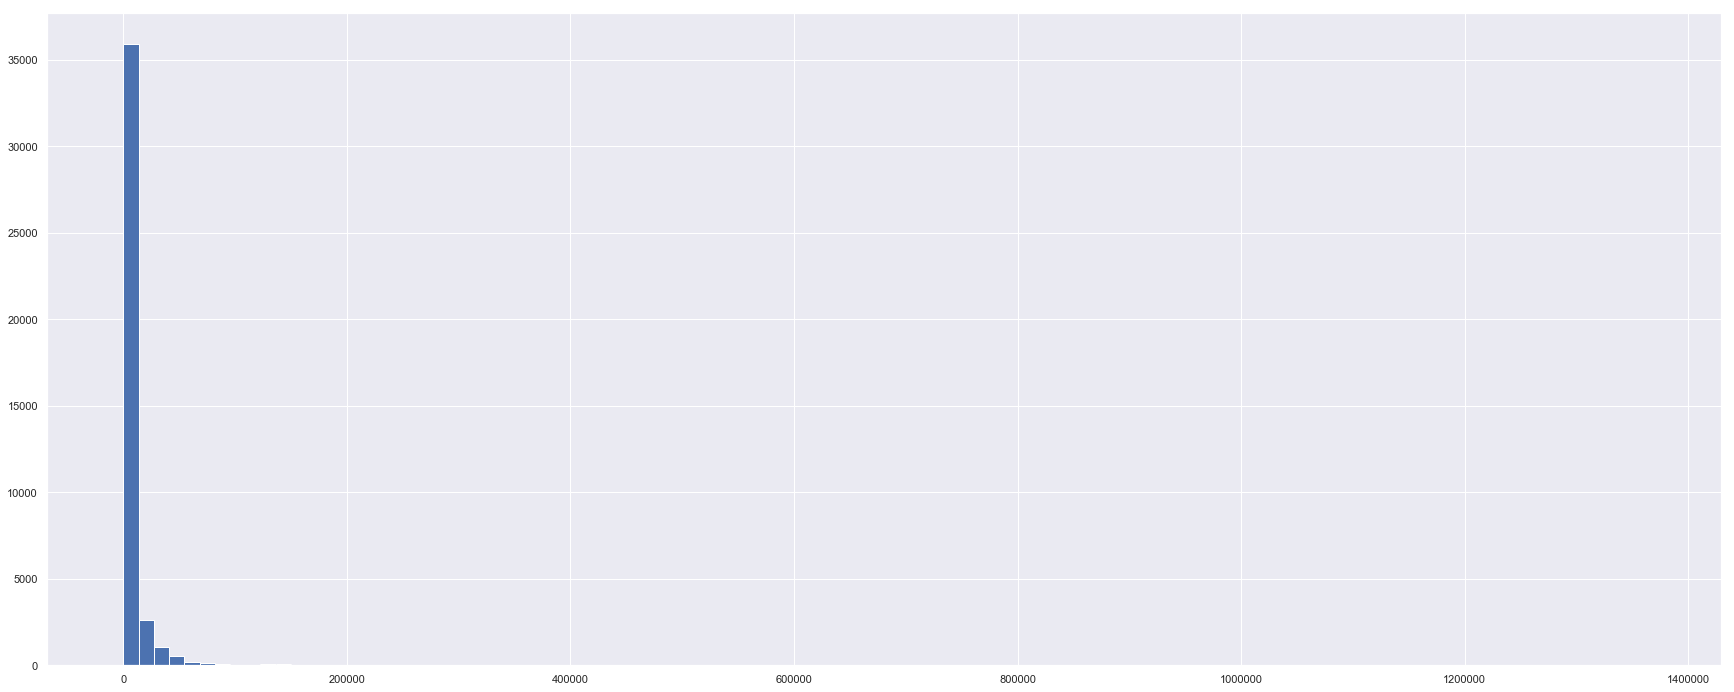

In [94]:
plt.hist(comments, bins = 100)

Text(0.5,1,'Plot of Views vs. Likes')

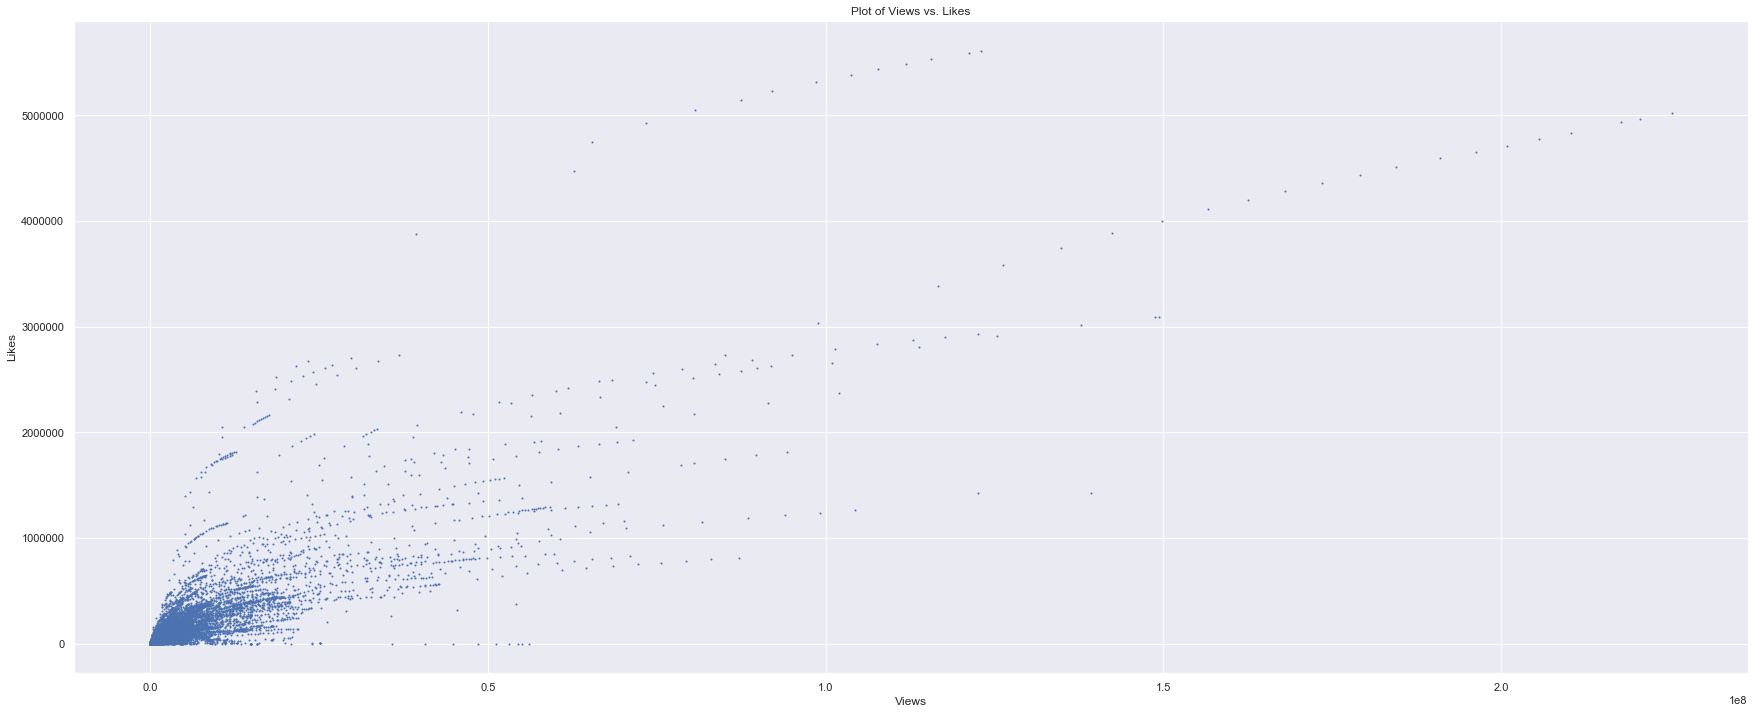

In [95]:
#There appears to be a generally linear relationship here, as one would expect.
plt.scatter(views, likes, s = 1)
np.corrcoef(views, likes)
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Plot of Views vs. Likes")

array([[1.        , 0.47221325],
       [0.47221325, 1.        ]])

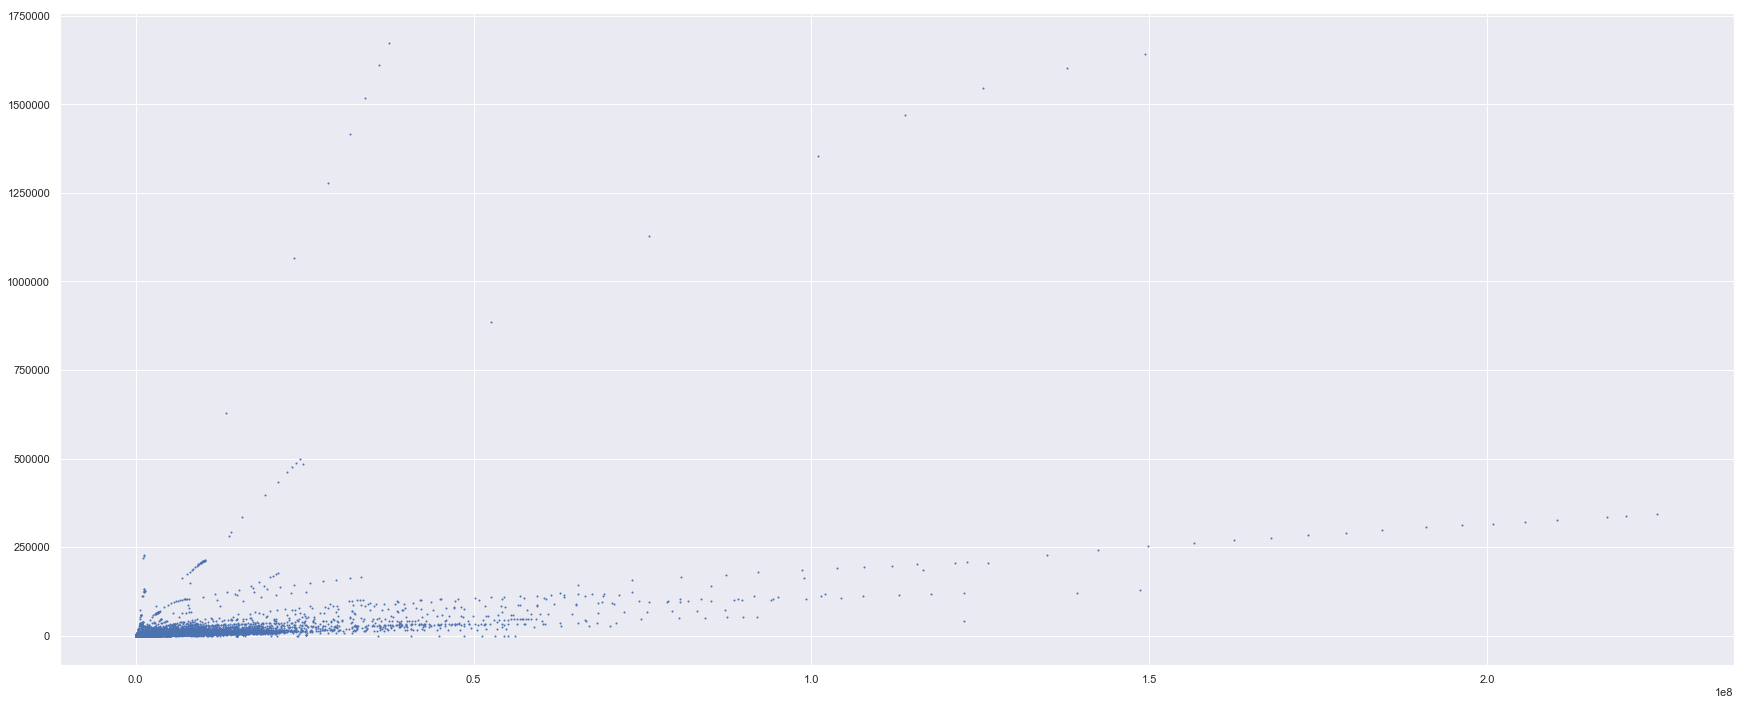

In [96]:
#Similar to views/likes relationship, however dislike count appears to be much lower than likes. Still apparent outliers. 
plt.scatter(views, dislikes, s = 1)
np.corrcoef(views, dislikes)

array([[1.        , 0.61762127],
       [0.61762127, 1.        ]])

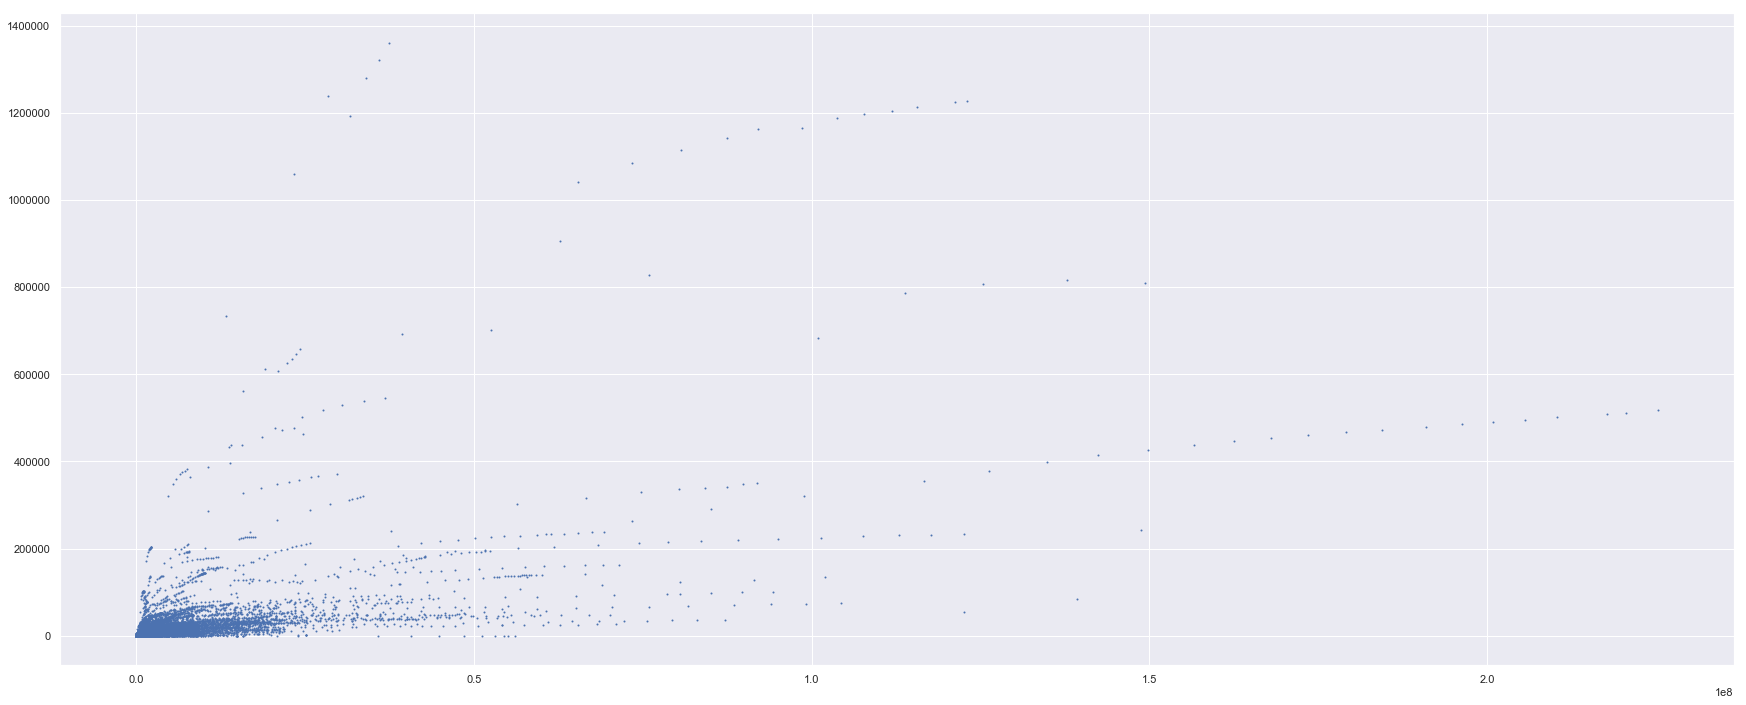

In [97]:
#Similar generally increasing relationship, which is expected. 
plt.scatter(views, comments, s = 1)
np.corrcoef(views, comments)

array([[1.        , 0.44718646],
       [0.44718646, 1.        ]])

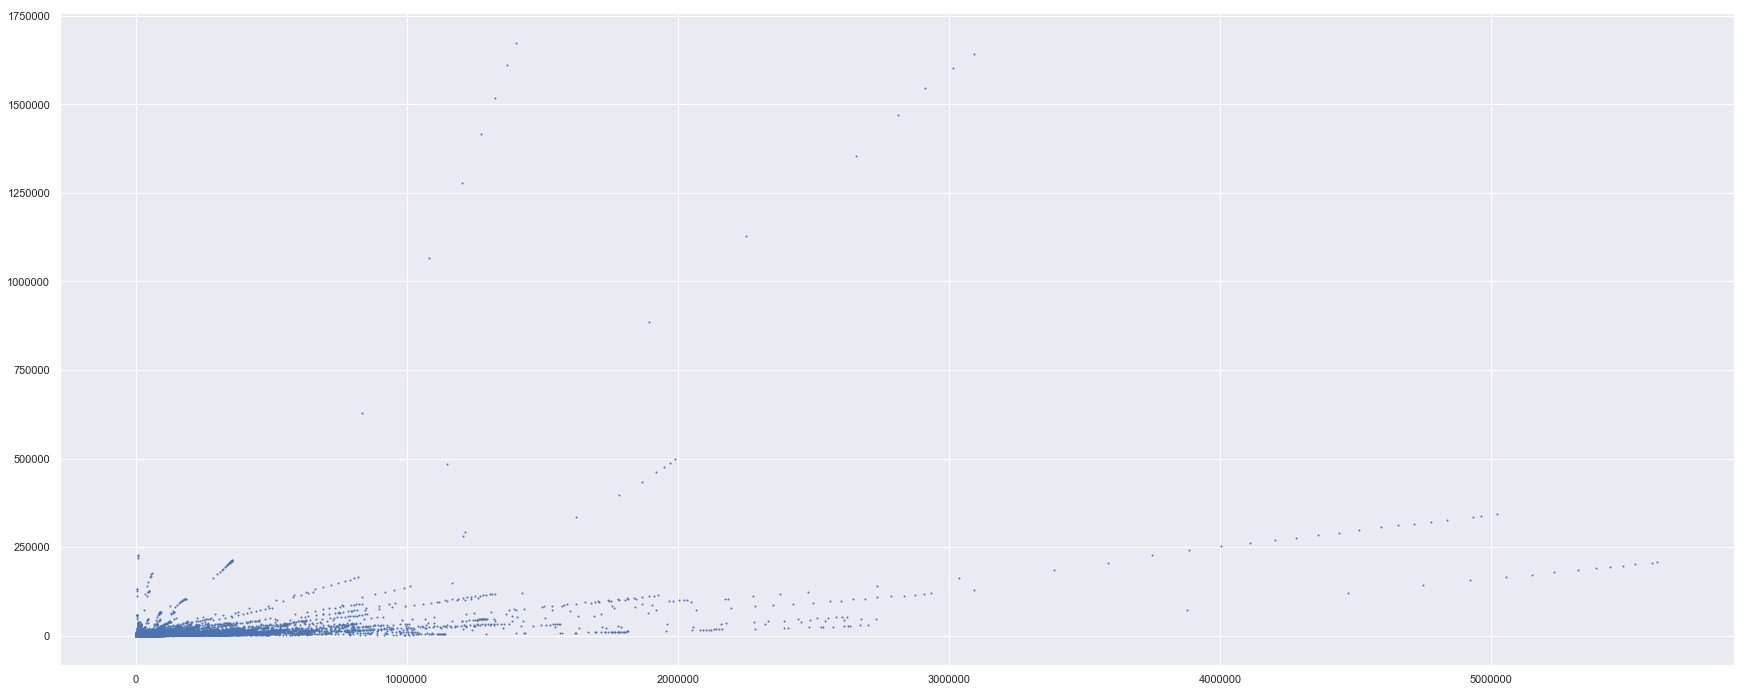

In [98]:
#Seems like there's a relationship between likes and dislikes but there's some apparent outliers
#The ratio 
plt.scatter(likes, dislikes, s = 1)
np.corrcoef(likes, dislikes)

array([[1.        , 0.80305686],
       [0.80305686, 1.        ]])

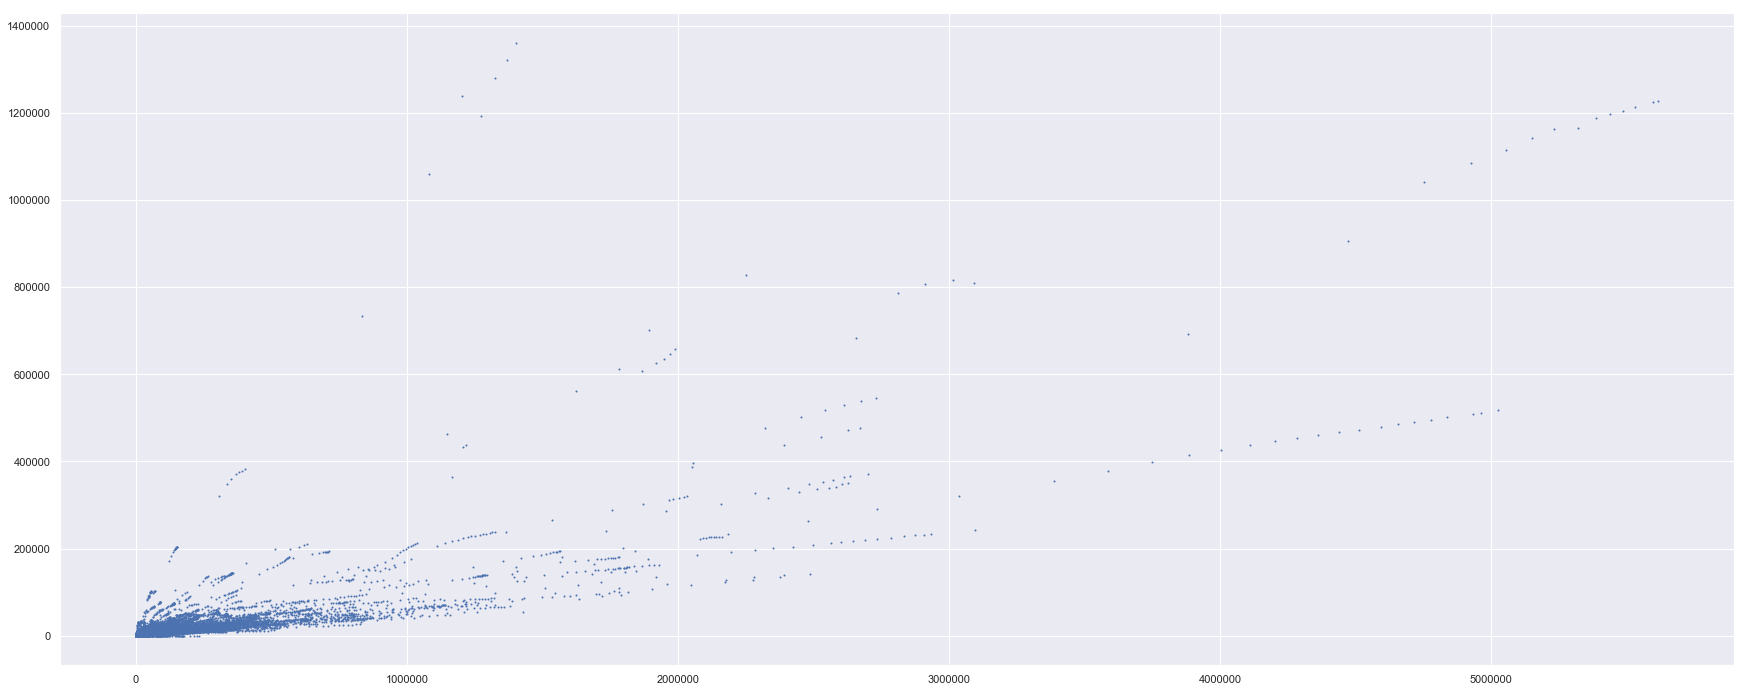

In [99]:
#Seems pretty linear for the most part, which makes sense as you'd expect people to 
#comment on videos they like. 
plt.scatter(likes, comments, s = 1)
np.corrcoef(likes, comments)

array([[1.        , 0.70018362],
       [0.70018362, 1.        ]])

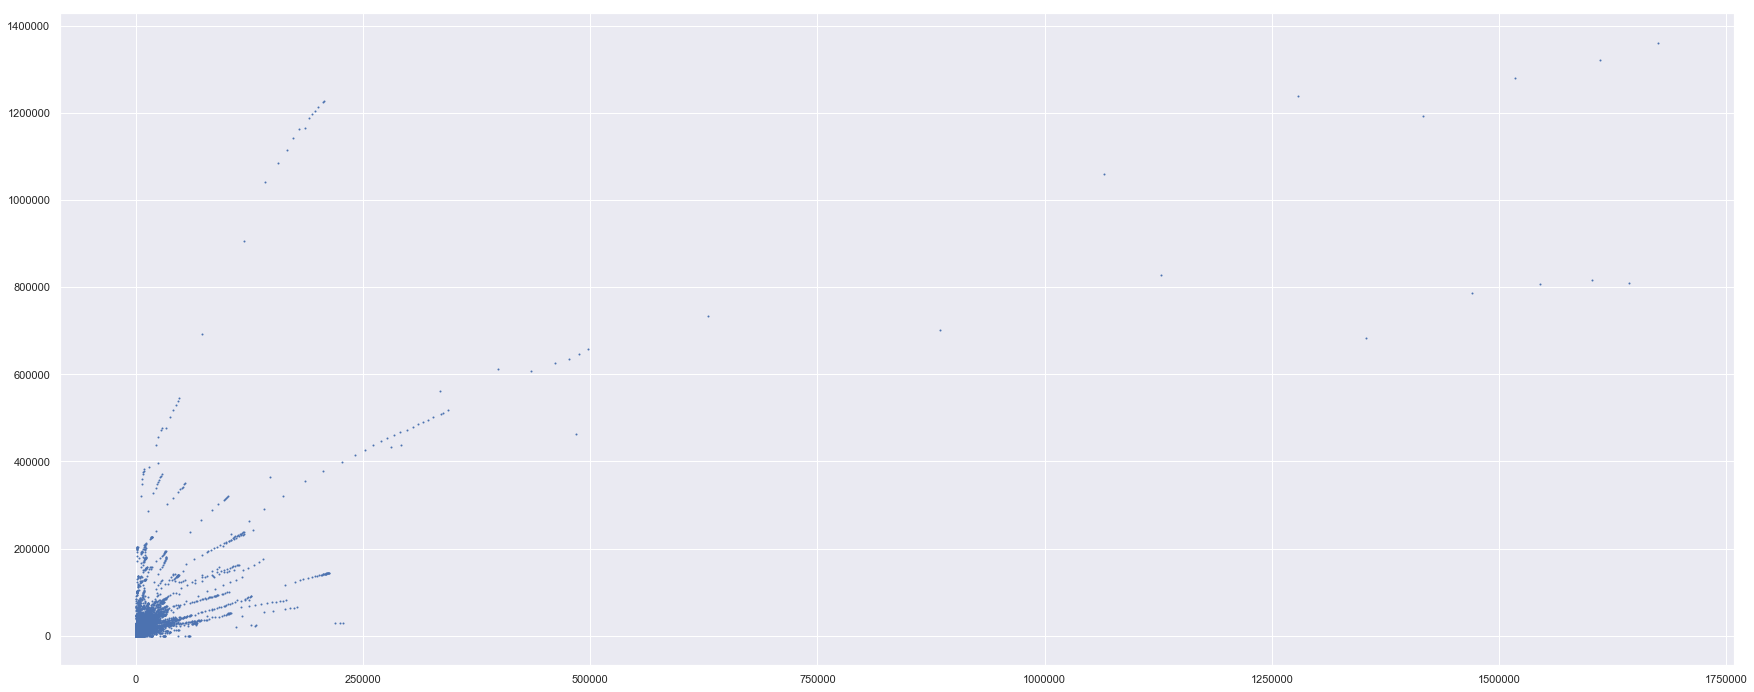

In [100]:
#This is interesting. 
plt.scatter(dislikes, comments, s = 1)
np.corrcoef(dislikes, comments)

In [101]:
#Prep for Question 6, getting the datetime into a more acceptable format. 
a = x['trending_date']
b = []
for i in a:
    m = i[6:8]
    d = i[3:5]
    y = i[0:2]
    c = (m + "-"+d+"-"+ y)
    b.append(c)
x['trending_date'] = b


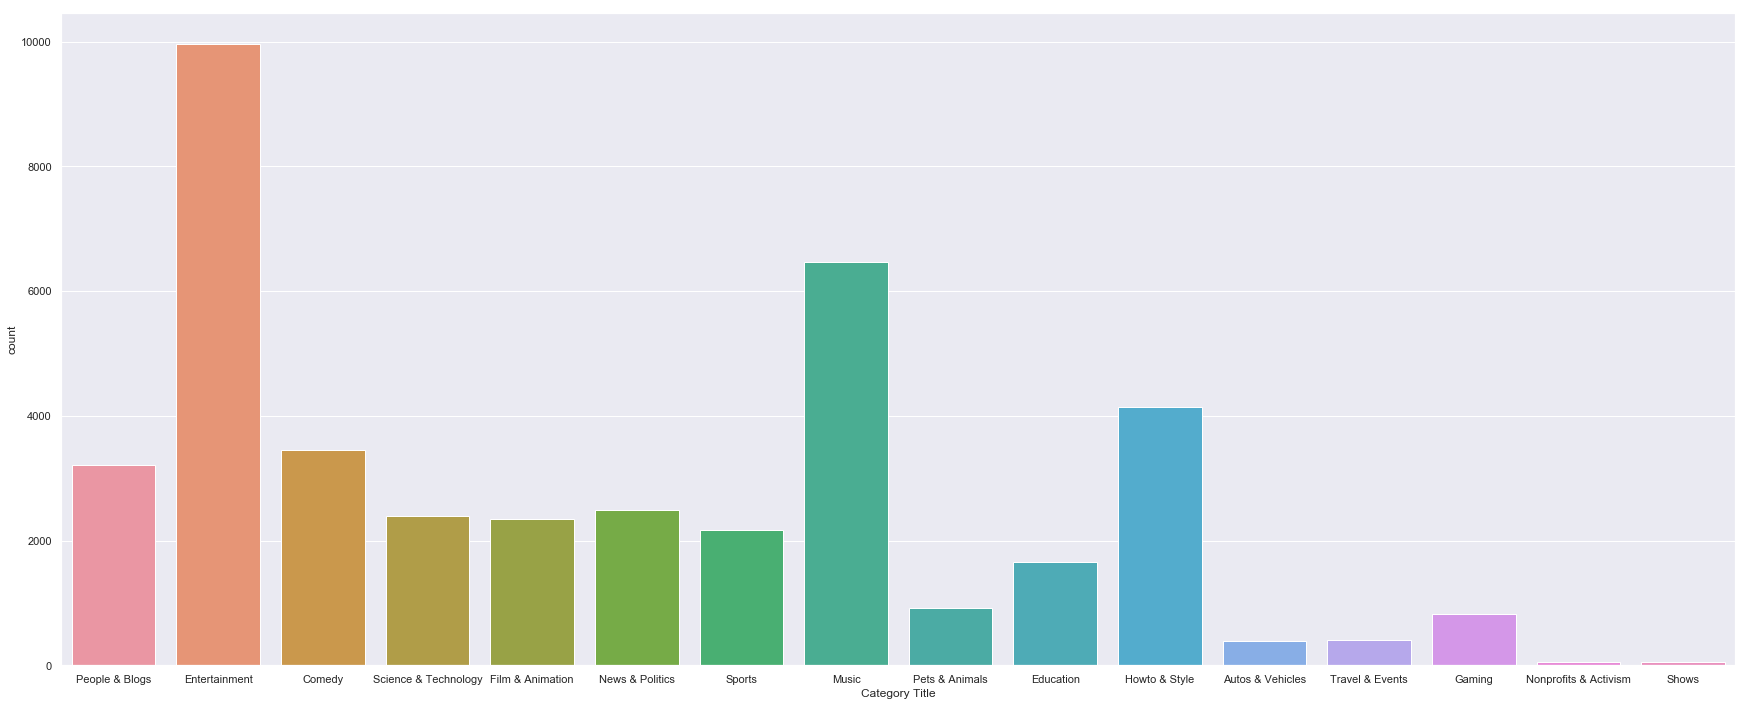

In [102]:
sns.set(rc={'figure.figsize':(30,12)})
sns.countplot(x['Category Title'])


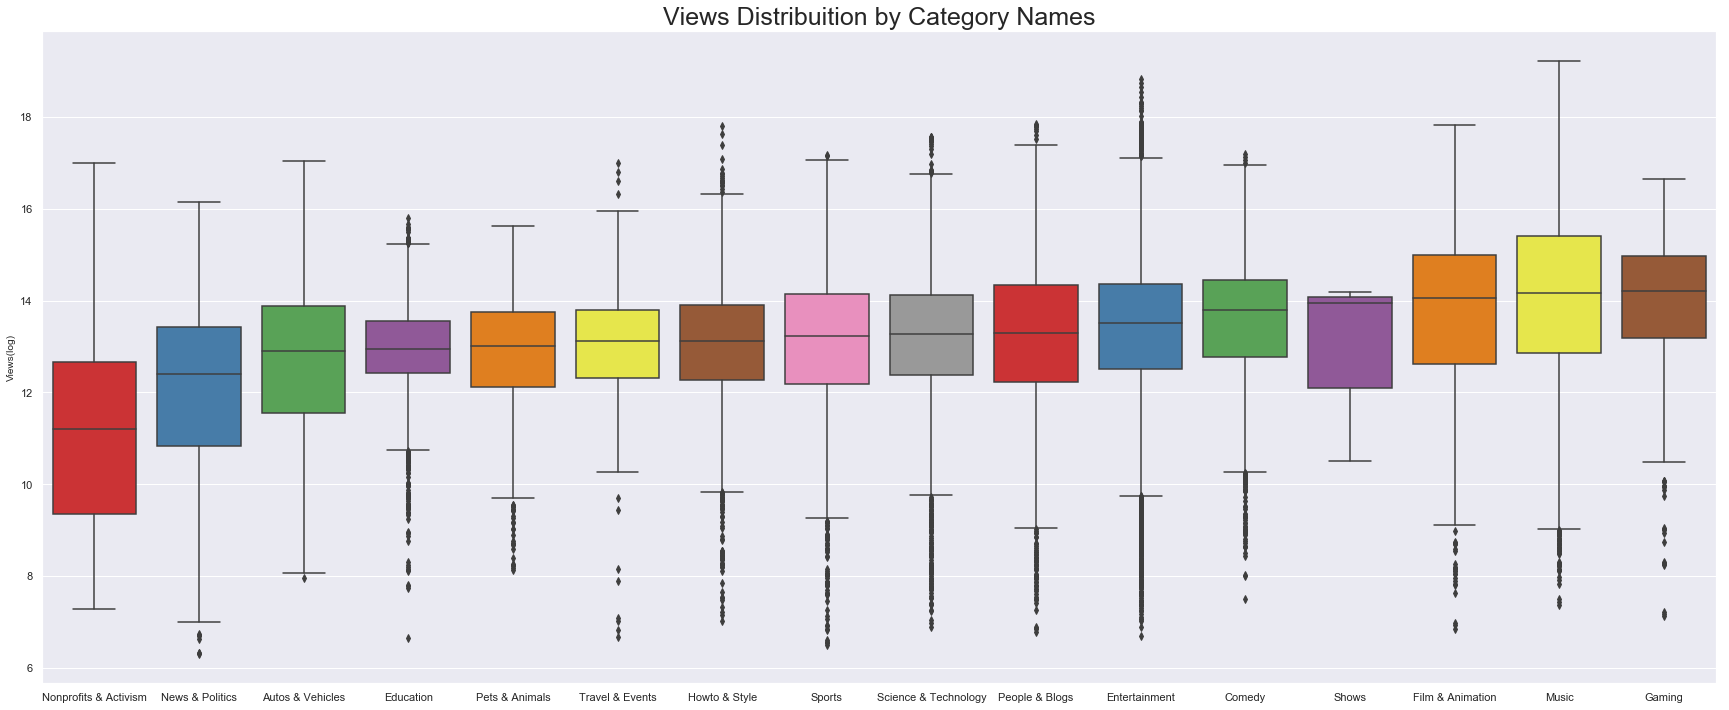

In [103]:
x['views_log'] = np.log(x['views'] + 1)
view_ranking = x.groupby("Category Title")['views'].median().sort_values().index
catplot = sns.boxplot(x='Category Title', y='views_log', data=x, palette="Set1", order = view_ranking)
catplot.set_title("Views Distribuition by Category Names", fontsize=25)
catplot.set_xlabel("", fontsize=8)
catplot.set_ylabel("Views(log)", fontsize=10)
plt.show()

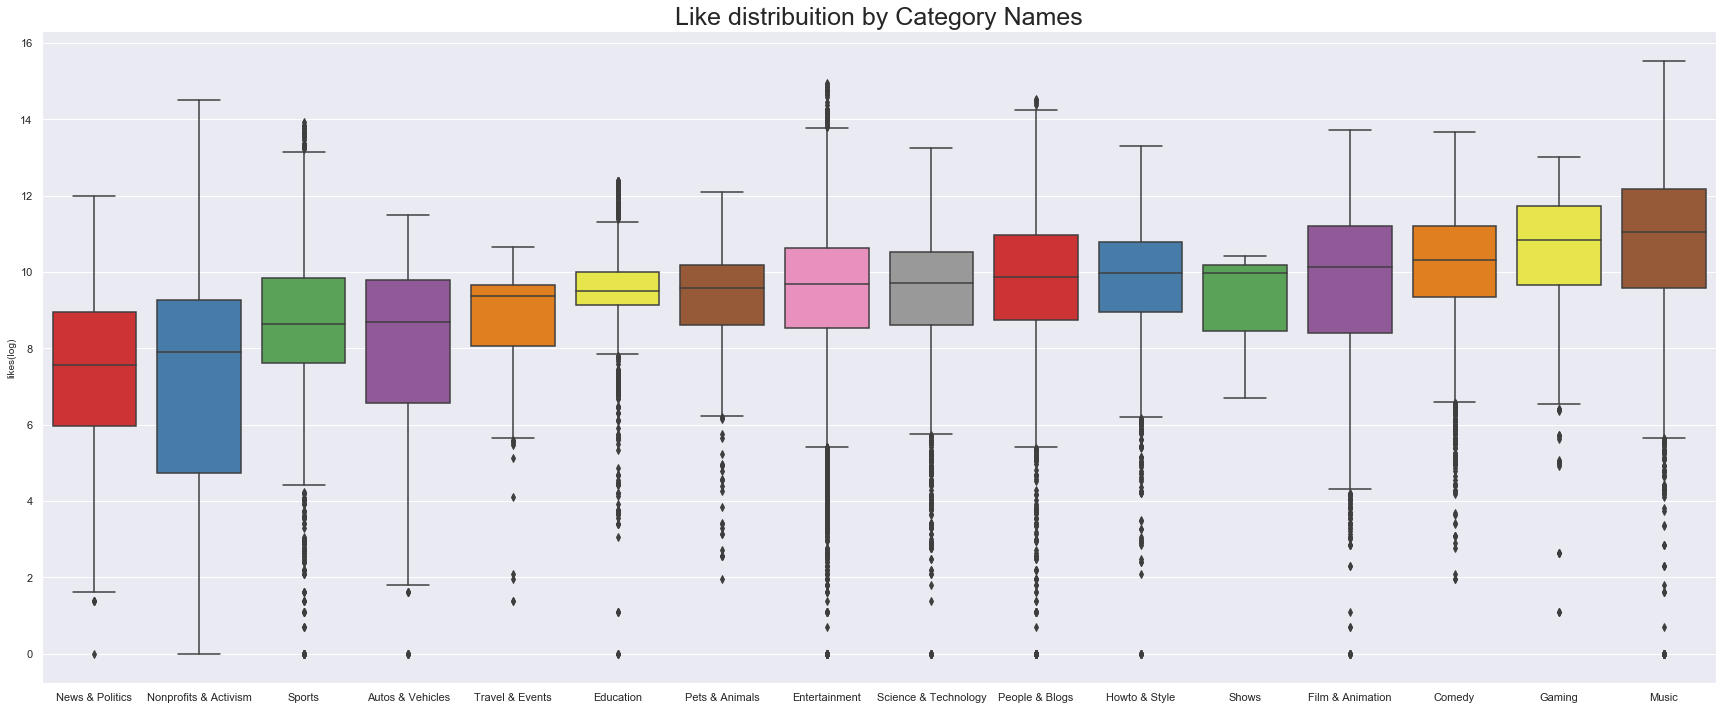

In [104]:
x['likes_log'] = np.log(x['likes'] + 1)
likes_ranking = x.groupby("Category Title")['likes'].median().sort_values().index
catplot = sns.boxplot(x='Category Title', y='likes_log', data=x, palette="Set1", order = likes_ranking)
catplot.set_title("Like distribuition by Category Names", fontsize=25)
catplot.set_xlabel("", fontsize=8)
catplot.set_ylabel("likes(log)", fontsize=10)
plt.show()

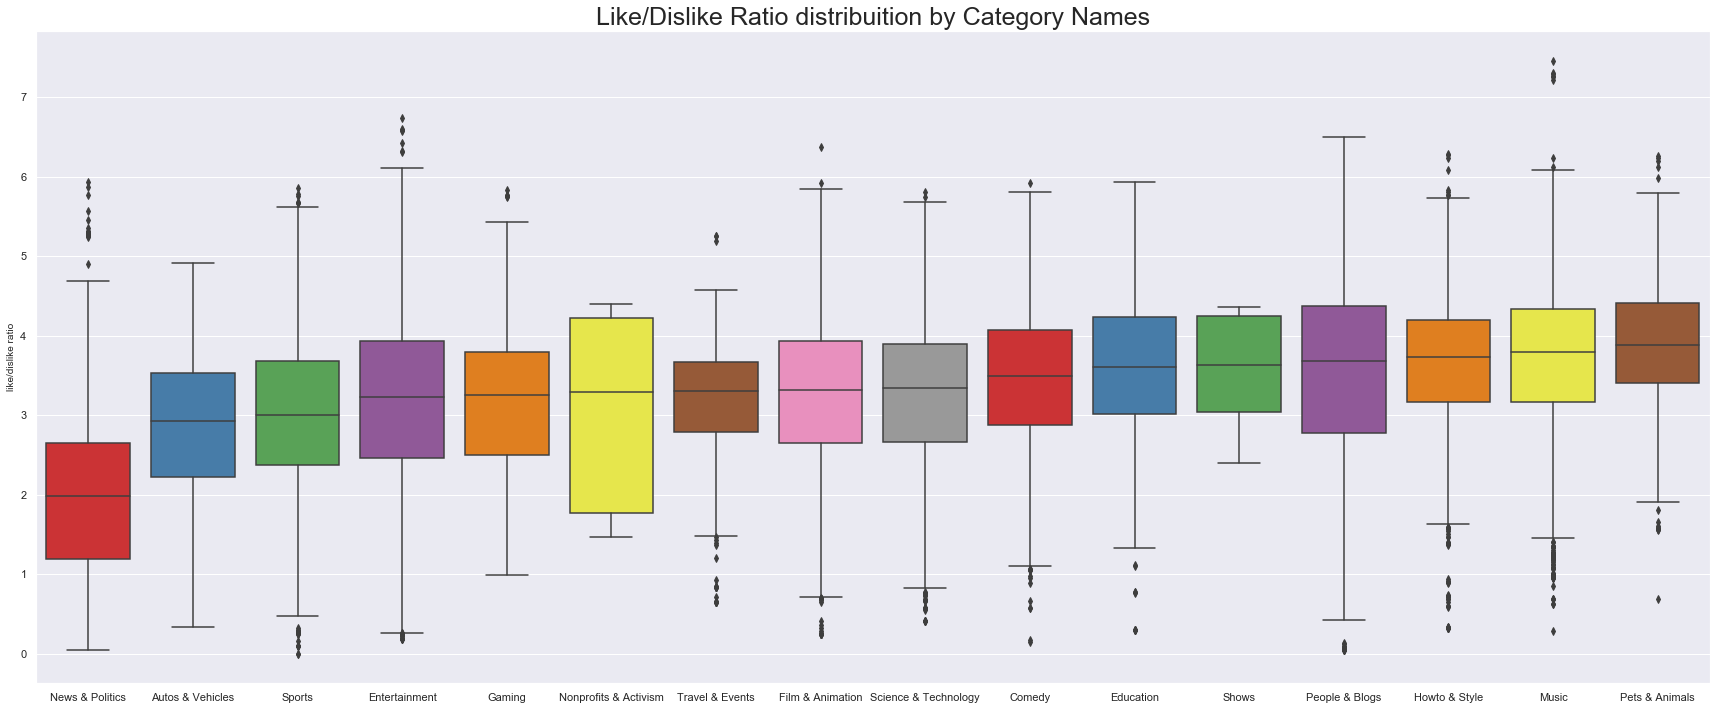

In [105]:
x['like_dislike_ratio'] = np.log(x['likes']/x['dislikes'] + 1)
like_dislike_ranking = x.groupby("Category Title")['like_dislike_ratio'].median().sort_values().index
catplot = sns.boxplot(x='Category Title', y='like_dislike_ratio', data=x, palette="Set1", order = like_dislike_ranking)
catplot.set_title("Like/Dislike Ratio distribuition by Category Names", fontsize=25)
catplot.set_xlabel("", fontsize=8)
catplot.set_ylabel("like/dislike ratio", fontsize=10)
plt.show()

### Machine Learning

[[1.         0.87876251]
 [0.87876251 1.        ]]
[0.77419185 0.51992672 0.24634905 0.74792578 0.7802408 ]


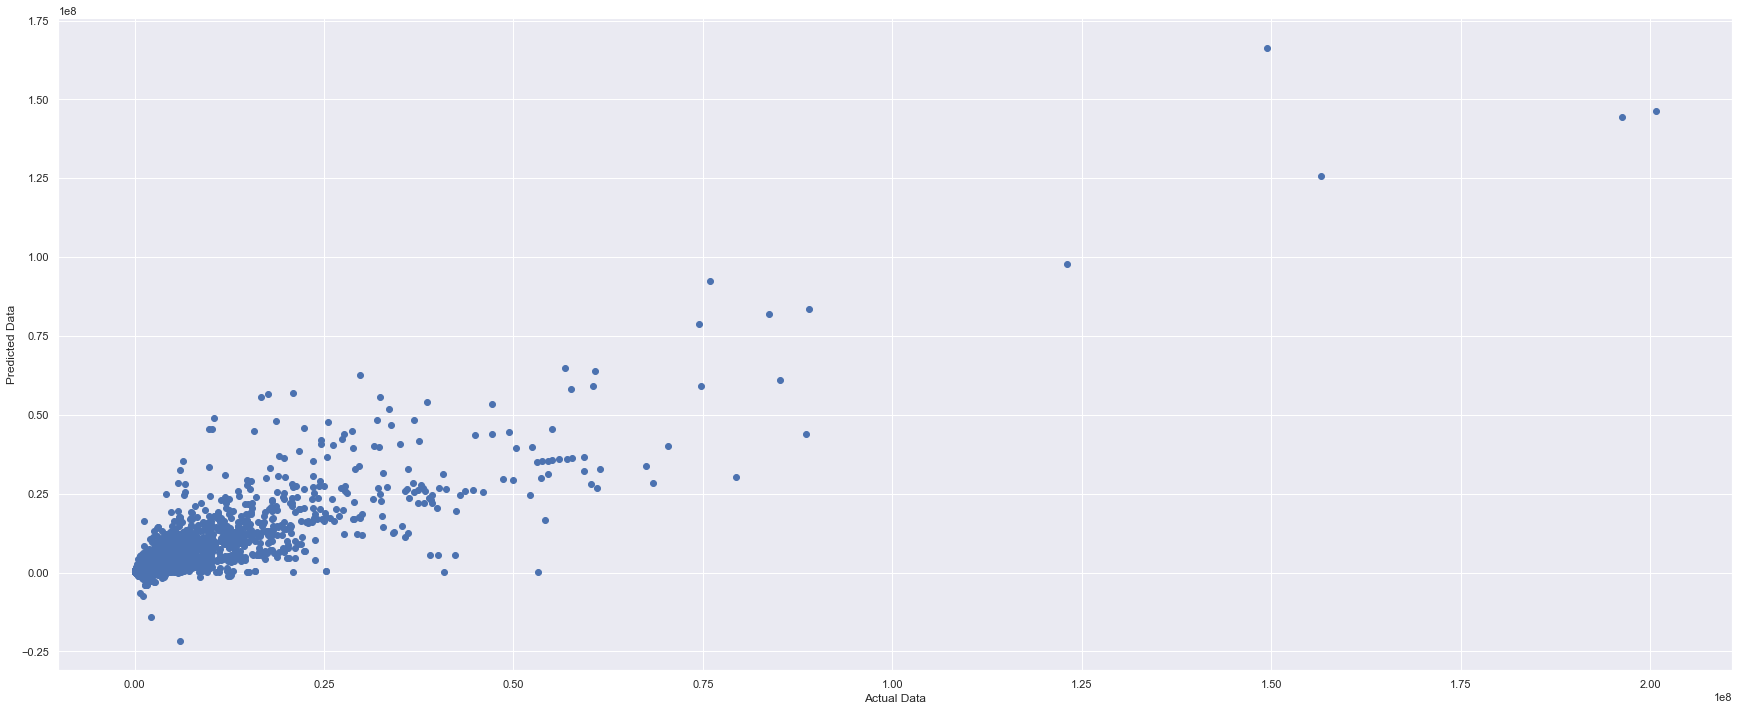

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

test = x[['likes', 'dislikes', 'comment_count']]
test2 = x['views']
X_train, X_test, y_train, y_test = train_test_split(test, test2, test_size = .25, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
plt.scatter(y_test, lr.predict(X_test))
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
print(np.corrcoef(y_test, lr.predict(X_test)))
cv_scores = cross_val_score(lr, test, test2, cv = 5)
print(cv_scores)

+ This plot indicates a relatively high correlation betwen the predicted and actual data points. 

+ Since the y intercept for this model is rather high, and through EDA it was determined that the distribution of views is highly skewed to the right, with many videos having very few views, it is safe to assume this model is more accurate with videos that have higher numbers of views.

+ To use the model on a specific category, using this code all that would need to be done is to include x = x[x['Category Title'] == Desired Category]] as a preprocessing step (this is only one example of filtering by category). 

In [107]:
from sklearn.metrics import mean_squared_error

print("The Coefficients for likes, dislikes, and comments are: ", lr.coef_)
print("The y intercept for this model is: ", lr.intercept_)
print("The MSE for this model is:", mean_squared_error(y_test, lr.predict(X_test)))

The Coefficients for likes, dislikes, and comments are:  [ 35.64054909  81.98116473 -97.163686  ]
The y intercept for this model is:  229290.38552703802
The MSE for this model is: 10474320703251.04


In [108]:
for i in range(1, 10):
    reg = RandomForestRegressor(n_estimators = i)
    reg.fit(X_train, y_train)
    print("For", i, "estimators the correlation coefficient is", np.corrcoef(reg.predict(X_test), y_test)[0][1])
   

For 1 estimators the correlation coefficient is 0.8988548111539296
For 2 estimators the correlation coefficient is 0.9533411180379714
For 3 estimators the correlation coefficient is 0.9561828292563468
For 4 estimators the correlation coefficient is 0.9578048727563973
For 5 estimators the correlation coefficient is 0.9602791687133982
For 6 estimators the correlation coefficient is 0.9615270349915654
For 7 estimators the correlation coefficient is 0.9601777055430631
For 8 estimators the correlation coefficient is 0.9643138580385962
For 9 estimators the correlation coefficient is 0.9642151926594527


[[1.         0.95964033]
 [0.95964033 1.        ]]


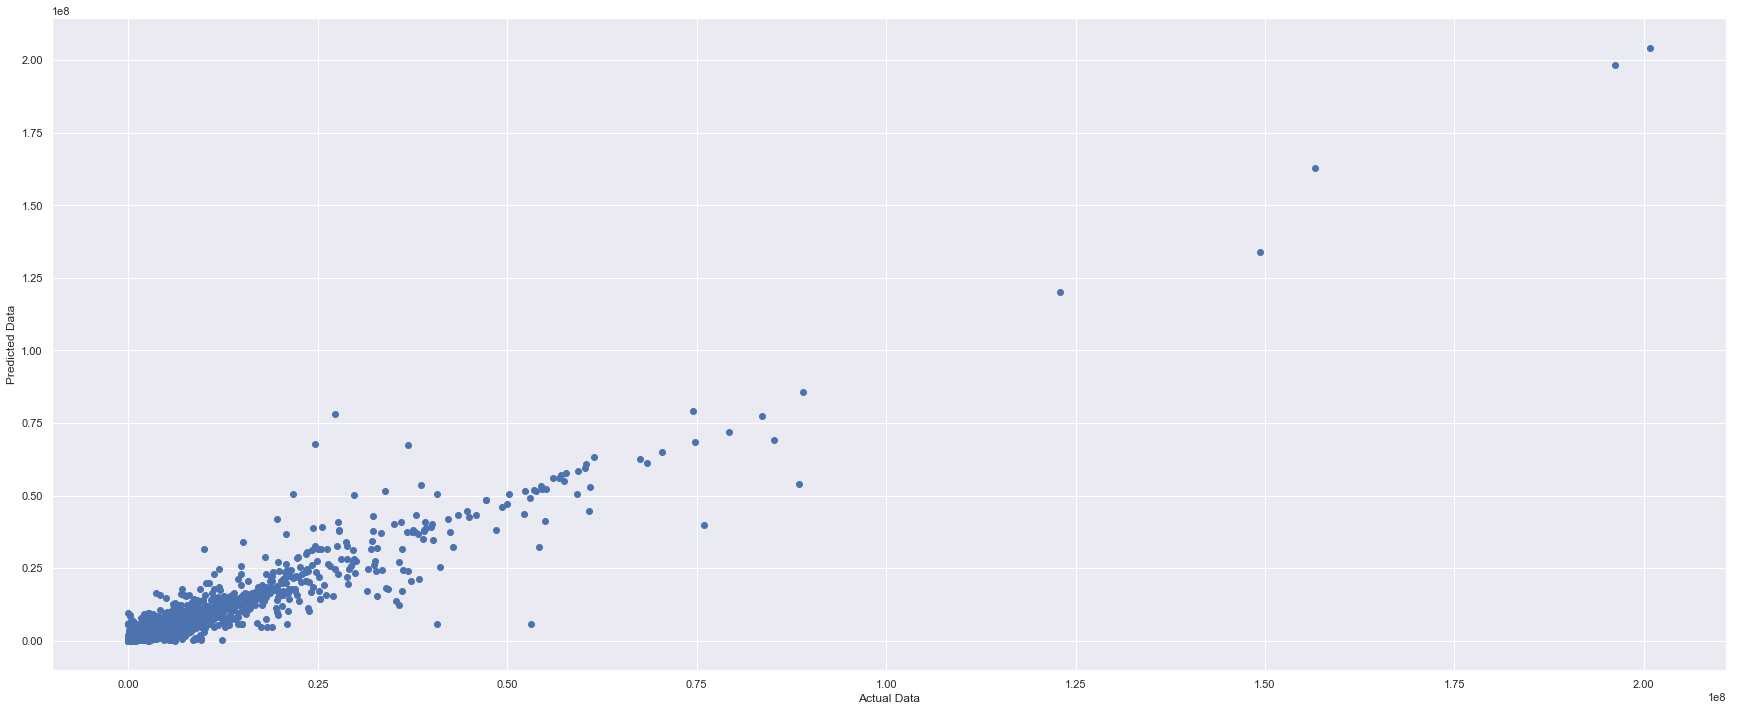

In [109]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 9)
reg.fit(X_train, y_train)
plt.scatter(y_test,reg.predict(X_test))
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
print(np.corrcoef(reg.predict(X_test), y_test))


In [110]:
print(cross_val_score(reg, test, test2, cv = 10))

[0.81972672 0.64565673 0.72267447 0.43029669 0.40683055 0.72208244
 0.8094493  0.81125524 0.86831426 0.89074315]
